<a href="https://colab.research.google.com/github/petedanN/ML-Data-Preprocessing/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

##**Data Exploration**
###Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.


In [4]:
#Load Dataset
df = pd.read_csv("Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [5]:
#Shape of the Dataset
df.shape
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 148
Number of Columns: 6


In [6]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [7]:
#Basic information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [8]:
#Descriptive statistics of Dataset
df.describe(include = "all")

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [9]:
#List down the unique values in each feature and find its length.
def unique_values(df):
    for column in df.columns:
        print(f"Unique Values in feature '{column}': {df[column].unique()} Length: {df[column].nunique()}\n")
unique_values(df)

Unique Values in feature 'Company': ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] Length: 6

Unique Values in feature 'Age': [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] Length: 29

Unique Values in feature 'Salary': [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] Length: 40

Unique Values in feature 'Place': ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] Length: 11

Unique Values in feature 'Country': ['India'] Length: 1

Unique Values in feature 'Gender': [0 1] Length: 2



In [10]:
#Perform the statistical analysis and renaming of the columns.
df.rename(columns={'Company': 'Company Name'}, inplace=True)
print("After Renaming", df.columns)
df['Company Name'] = df['Company Name'].replace('Infosys Pvt Lmt', 'Infosys')
df['Company Name'] = df['Company Name'].replace('Tata Consultancy Services','TCS')
df['Company Name'] = df['Company Name'].replace('Congnizant','CTS')

After Renaming Index(['Company Name', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [11]:
unique_values(df)

Unique Values in feature 'Company Name': ['TCS' 'Infosys' 'CTS' nan] Length: 3

Unique Values in feature 'Age': [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] Length: 29

Unique Values in feature 'Salary': [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] Length: 40

Unique Values in feature 'Place': ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] Length: 11

Unique Values in feature 'Country': ['India'] Length: 1

Unique Values in feature 'Gender': [0 1] Length: 2



## **Data Cleaning**
### Find the missing and inappropriate values, treat them appropriately.
###Remove all duplicate rows. Find the outliers. Replace the value 0 in age as NaN.
###Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode).###


In [12]:
#Find missing values
missing_values = df.isnull().sum()
missing_values

,0
Company Name,8
Age,18
Salary,24
Place,14
Country,0
Gender,0


In [13]:
#Find and treat missing and inappropriate values

df['Age'].replace(0, np.nan, inplace=True)             # Replace 0 in 'age' with NaN

df.drop_duplicates(inplace=True)                       # Remove all duplicate rows

df['Age'].fillna(df['Age'].median(), inplace=True)     # Replace NaN in 'age' with median

df['Salary'].fillna(df['Salary'].mean(), inplace=True) # Replace NaN in 'salary' with mean


# Replace NaN in categorical columns with mode

df['Company Name'].fillna(df['Company Name'].mode()[0], inplace=True)
df['Place'].fillna(df['Place'].mode()[0], inplace=True)
df['Country'].fillna(df['Country'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

cleaned_missing_values = df.isnull().sum()
cleaned_data_length = len(df)

cleaned_missing_values, cleaned_data_length, df.head()

(Company Name    0
 Age             0
 Salary          0
 Place           0
 Country         0
 Gender          0
 dtype: int64,
 144,
   Company Name   Age       Salary     Place Country  Gender
 0          TCS  20.0  5283.471074   Chennai   India       0
 1      Infosys  30.0  5283.471074    Mumbai   India       0
 2          TCS  35.0  2300.000000  Calcutta   India       0
 3      Infosys  40.0  3000.000000     Delhi   India       0
 4          TCS  23.0  4000.000000    Mumbai   India       0)

Text(0.5, 1.0, 'Boxplot of Salary')

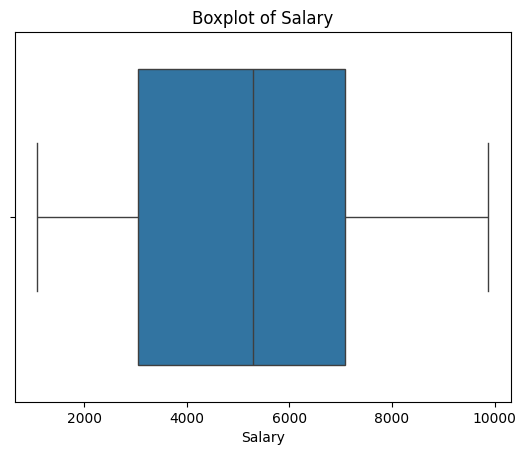

In [14]:
#Find the outliers.

sns.boxplot(x='Salary',data =df)
plt.title('Boxplot of Salary')

Text(0.5, 1.0, 'Boxplot of Age')

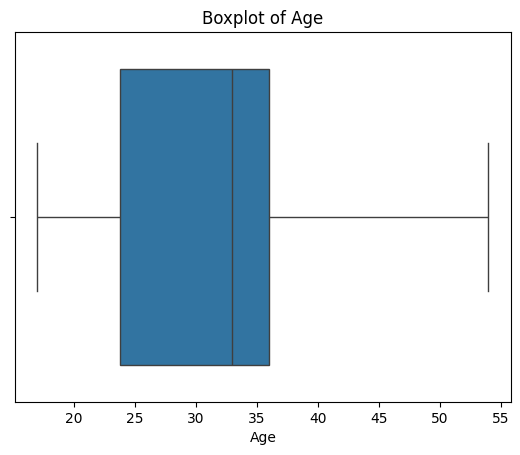

In [15]:
sns.boxplot(x='Age',data =df)
plt.title('Boxplot of Age')

In [16]:
#find outliers using IQR

def find_outliers_IQR(column):
    Q1  = column.quantile(0.25)
    Q2  = column.quantile(0.75)
    IQR = Q2-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q2+(1.5*IQR)
    return (column > upper_bound) | (column < lower_bound)

salary_outliers = find_outliers_IQR(df['Salary'])
age_outliers = find_outliers_IQR(df['Age'])
print("Number of outliers in Salary:", salary_outliers.sum())
print("Number of outliers in Age:", age_outliers.sum())

Number of outliers in Salary: 0
Number of outliers in Age: 0


##**Data Analysis**
###Filter the data with age >40 and salary <5000.
###Plot the chart with age and salary.
###Count the number of people from each place and represent it visually.


In [17]:
# Filter the data where Age > 40 and Salary < 5000
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_data

,Company Name,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


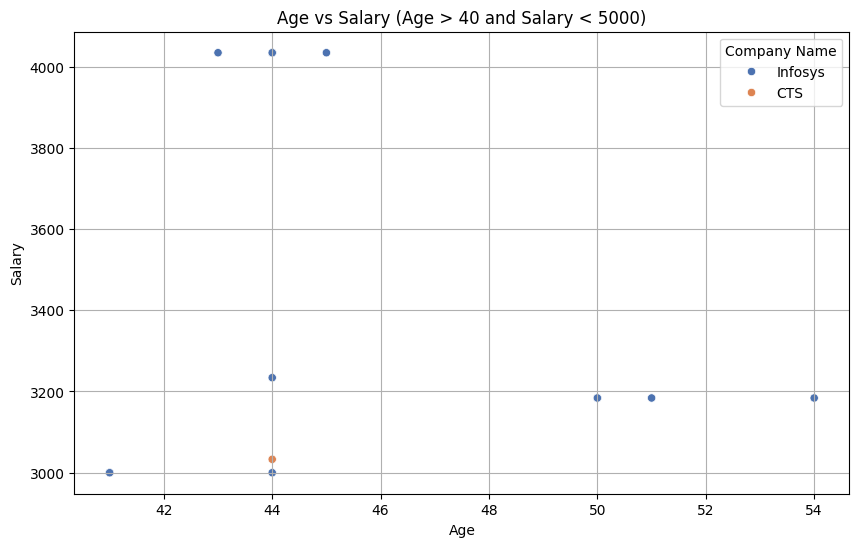

In [18]:
# Plotting Age vs Salary

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Age', y='Salary', hue="Company Name",palette='deep')
plt.title('Age vs Salary (Age > 40 and Salary < 5000)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

 Number of people from each Place Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


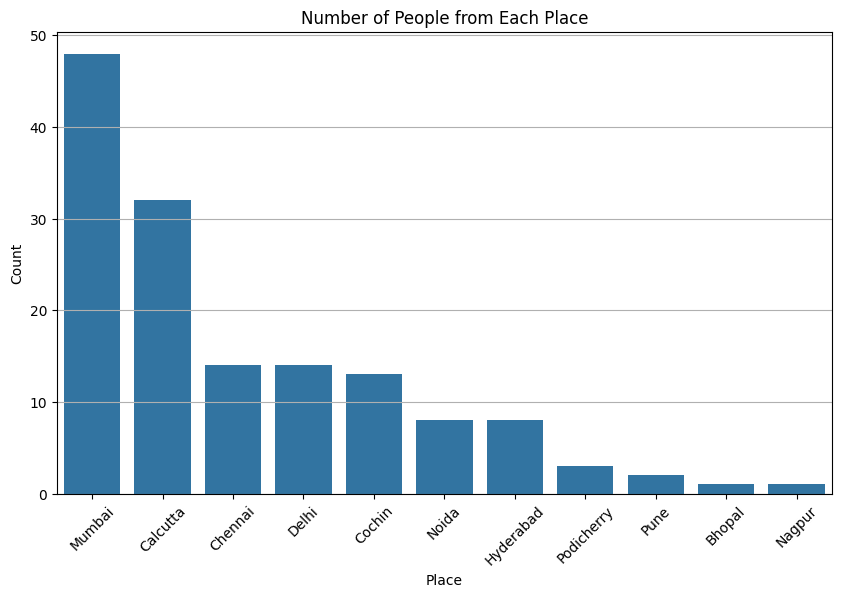

In [19]:
# Count the number of people from each place
place_counts = df['Place'].value_counts()
print(" Number of people from each Place", place_counts)

# Plot the counts
plt.figure(figsize=(10,6))
sns.barplot(x=place_counts.index,y=place_counts.values)
plt.xlabel("Place")
plt.ylabel("Count")
plt.title("Number of People from Each Place")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##**Data Encoding**
###Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [20]:
# Apply One-Hot Encoding to the 'Company_Name' and 'Work_Location' columns
df_one_hot = pd.get_dummies(df, columns=['Company Name', 'Place'], drop_first=True)

df_one_hot


,Age,Salary,Country,Gender,Company Name_Infosys,Company Name_TCS,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,20.0,5283.471074,India,0,False,True,False,True,False,False,False,False,False,False,False,False
1,30.0,5283.471074,India,0,True,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.000000,India,0,False,True,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.000000,India,0,True,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.000000,India,0,False,True,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.000000,India,0,True,False,False,False,False,False,False,True,False,False,False,False
143,33.0,9024.000000,India,1,False,True,True,False,False,False,False,False,False,False,False,False
145,44.0,4034.000000,India,1,True,False,False,False,False,True,False,False,False,False,False,False
146,33.0,5034.000000,India,1,False,True,False,False,False,False,False,True,False,False,False,False


In [21]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Company_Name' and 'Work_Location' columns
df['Company_Name_Label'] = label_encoder.fit_transform(df['Company Name'])
df['Work_Location_Label'] = label_encoder.fit_transform(df['Place'])

df[['Company Name', 'Company_Name_Label', 'Place', 'Work_Location_Label']]


,Company Name,Company_Name_Label,Place,Work_Location_Label
0,TCS,2,Chennai,2
1,Infosys,1,Mumbai,6
2,TCS,2,Calcutta,1
3,Infosys,1,Delhi,4
4,TCS,2,Mumbai,6
...,...,...,...,...
142,Infosys,1,Mumbai,6
143,TCS,2,Calcutta,1
145,Infosys,1,Delhi,4
146,TCS,2,Mumbai,6


##**Feature Scaling**
###After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [22]:
# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

columns_to_scale = ['Age', 'Salary'] + [col for col in df.columns if 'Label' in col]

# Apply StandardScaler
df_standard_scaled = df.copy()
df_standard_scaled[columns_to_scale] = standard_scaler.fit_transform(df_standard_scaled[columns_to_scale])

# Apply MinMaxScaler
df_minmax_scaled = df.copy()
df_minmax_scaled[columns_to_scale] = minmax_scaler.fit_transform(df_minmax_scaled[columns_to_scale])

In [23]:
df_standard_scaled

,Company Name,Age,Salary,Place,Country,Gender,Company_Name_Label,Work_Location_Label
0,TCS,-1.484676,0.000000,Chennai,India,0,1.019256,-0.893255
1,Infosys,-0.267174,0.000000,Mumbai,India,0,-0.214129,0.750562
2,TCS,0.341577,-1.264122,Calcutta,India,0,1.019256,-1.304209
3,Infosys,0.950328,-0.967526,Delhi,India,0,-0.214129,-0.071346
4,TCS,-1.119426,-0.543818,Mumbai,India,0,1.019256,0.750562
...,...,...,...,...,...,...,...,...
142,Infosys,-1.241176,1.236606,Mumbai,India,0,-0.214129,0.750562
143,TCS,0.098077,1.584894,Calcutta,India,1,1.019256,-1.304209
145,Infosys,1.437329,-0.529412,Delhi,India,1,-0.214129,-0.071346
146,TCS,0.098077,-0.105703,Mumbai,India,1,1.019256,0.750562


In [24]:
df_minmax_scaled

,Company Name,Age,Salary,Place,Country,Gender,Company_Name_Label,Work_Location_Label
0,TCS,0.081081,0.477350,Chennai,India,0,1.0,0.2
1,Infosys,0.351351,0.477350,Mumbai,India,0,0.5,0.6
2,TCS,0.486486,0.137817,Calcutta,India,0,1.0,0.1
3,Infosys,0.621622,0.217480,Delhi,India,0,0.5,0.4
4,TCS,0.162162,0.331285,Mumbai,India,0,1.0,0.6
...,...,...,...,...,...,...,...,...
142,Infosys,0.135135,0.809491,Mumbai,India,0,0.5,0.6
143,TCS,0.432432,0.903039,Calcutta,India,1,1.0,0.1
145,Infosys,0.729730,0.335154,Delhi,India,1,0.5,0.4
146,TCS,0.432432,0.448959,Mumbai,India,1,1.0,0.6
